# General Flow for Training/Fitting Models

In [1]:
!wget -q https://github.com/PSAM-5020-2025S-A/5020-utils/raw/main/src/data_utils.py

In [2]:
import pandas as pd

from sklearn.model_selection import train_test_split

from data_utils import RandomForestClassifier, StandardScaler
from data_utils import classification_error, display_confusion_matrix
from data_utils import object_from_json_url

### 3 Stages
- Data Prep: Encoding, Scaling, Clustering, sometimes Splitting into train/test datasets
- Modeling: `fit()` classifier
- Evaluation: `predict()` and measure error

#### Data Prep:
Do we need to split our data, or is it already split into train/test sets?

If it's already split we prepare the Encoding, Scaling, Clustering objects using the `train` data (usually with the `fit_transform()` function), and then we use those same objects to encode, scale, cluster the `test` data (usually with the `transform()` function).

If the data is not split into two datasets, we could first split it and repeat the steps above, or, although it might add a bit of bias to the models, we could perform encoding, scaling, clustering with `fit_transform()` on the entire dataset and then only split the already encoded, scaled, clustered data. This biases the encoder, scaler, cluster models, and in turn, the model, but is a bit easier to perform.

#### Modeling
Once we have `train` and `test` datasets that has been encoded, scaled, clustered, we can use the `train` dataset to fit a supervised model (classifier, regression, etc).

Here we will usually call a `fit()` function with the training dataset's features and, separately, its labels or outcome variable values. Something like `fit(features, labels)`.

#### Evaluation
We have a model we trained/fitted with the `train` dataset. Now we can measure how well it actually performs once it's used without the correct labels.

Here we usually call `predict()` with a dataset's features to get label or regression predictions.

We want to call `predict()` for both the `train` and `test` dataset, and then measure how close those predictions are to the actual labels and values that we have in our dataset.

Eavluating with the `train` dataset will tell us if the model is capable of learning anything about the data. Evaluating with the `train` dataset will tell us if the model is capable of learning patterns and trends beyond the data that is fed to it.

It's common for the model to perform better with the `train` data since it was trained using that data and labels, but the `test` dataset error is what's more important because it will tell us what kind of error to expect from data that the model hasn't seen.

### Example

Classifying penguins based on measurements.

Let's load a dataset and look.

In [3]:
PENGUIN_URL = "https://raw.githubusercontent.com/PSAM-5020-2025S-A/5020-utils/refs/heads/main/datasets/json/penguins.json"
penguin_data = object_from_json_url(PENGUIN_URL)

display(penguin_data)

[{'species': 'Adelie',
  'bill_length_mm': 39.1,
  'bill_depth_mm': 18.7,
  'flipper_length_mm': 181.0,
  'body_mass_g': 3750.0,
  'sex': 1},
 {'species': 'Adelie',
  'bill_length_mm': 39.5,
  'bill_depth_mm': 17.4,
  'flipper_length_mm': 186.0,
  'body_mass_g': 3800.0,
  'sex': 0},
 {'species': 'Adelie',
  'bill_length_mm': 40.3,
  'bill_depth_mm': 18.0,
  'flipper_length_mm': 195.0,
  'body_mass_g': 3250.0,
  'sex': 0},
 {'species': 'Adelie',
  'bill_length_mm': 36.7,
  'bill_depth_mm': 19.3,
  'flipper_length_mm': 193.0,
  'body_mass_g': 3450.0,
  'sex': 0},
 {'species': 'Adelie',
  'bill_length_mm': 39.3,
  'bill_depth_mm': 20.6,
  'flipper_length_mm': 190.0,
  'body_mass_g': 3650.0,
  'sex': 1},
 {'species': 'Adelie',
  'bill_length_mm': 38.9,
  'bill_depth_mm': 17.8,
  'flipper_length_mm': 181.0,
  'body_mass_g': 3625.0,
  'sex': 0},
 {'species': 'Adelie',
  'bill_length_mm': 39.2,
  'bill_depth_mm': 19.6,
  'flipper_length_mm': 195.0,
  'body_mass_g': 4675.0,
  'sex': 1},
 {'spe

It doesn't have separate train and test data, so we can either 

#### Pre-process and then split:

<img src="./imgs/datasplit-00.jpg" width="720px"/>

OR
#### Split and then process:

<img src="./imgs/datasplit-01.jpg" width="720px"/>

In [ ]:
# TODO: Put in DataFrames
penguin_df = pd.DataFrame(penguin_data)
penguin_df['species'] = penguin_df['species'].astype('category')
penguin_df['species'] = penguin_df['species'].cat.codes


# TODO: Encode Species Label
species = penguin_df['species']



### Split the Data

Using `train_test_split()`

In [5]:
# Split with train_test_split()
penguin_train, penguin_test = train_test_split(penguin_df, train_size=0.8)

In [14]:
# Add a "label" column to penguin_train based on the "species" column
penguin_train["label"] = penguin_train["species"]

penguin_scaler = StandardScaler()
train_scaled_df = penguin_scaler.fit_transform(penguin_train.drop(columns=["species", "label"]))

# Convert the scaled data back to a DataFrame
train_scaled_df = pd.DataFrame(train_scaled_df, columns=penguin_train.drop(columns=["species", "label"]).columns)

train_scaled_df["label"] = penguin_train["label"].values
display(train_scaled_df)
train_scaled_df.shape

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,label
0,0.423470,-1.082925,1.074599,0.605960,-1.015152,2
1,-0.446004,-1.233347,0.642267,0.605960,-1.015152,2
2,-1.037986,0.371154,-0.798839,-1.103488,-1.015152,0
3,-0.557000,0.471435,0.281991,0.108666,0.985074,0
4,1.496439,0.822420,-0.294452,-0.948083,0.985074,1
...,...,...,...,...,...,...
261,-0.168512,-1.333628,0.498157,0.295151,-1.015152,2
262,-1.518972,-0.280674,-0.798839,-1.445377,-1.015152,0
263,-0.242510,-1.484050,0.570212,0.605960,-1.015152,2
264,0.238476,0.772279,-0.942949,-0.854841,-1.015152,1


(266, 6)

In [16]:
# Add a "label" column to penguin_test based on the "species" column
penguin_test["label"] = penguin_test["species"]

# Transform Test data
test_scaled_df = penguin_scaler.transform(penguin_test.drop(columns=["species", "label"]))

# Convert the scaled data back to a DataFrame
test_scaled_df = pd.DataFrame(test_scaled_df, columns=penguin_test.drop(columns=["species", "label"]).columns)

test_scaled_df["label"] = penguin_test["label"].values
display(test_scaled_df)
test_scaled_df.shape

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,label
0,-0.501502,0.722138,-0.726783,-0.637275,0.985074,0
1,-1.407975,0.421294,-1.375281,-1.321054,-1.015152,0
2,-0.834492,0.822420,-0.798839,0.481637,0.985074,0
3,-1.500472,0.671998,-1.087060,-1.383216,-1.015152,0
4,-1.389476,0.321013,-1.159115,-0.637275,-1.015152,0
...,...,...,...,...,...,...
62,1.237446,0.070310,1.939263,1.724871,0.985074,2
63,-0.667997,0.371154,-1.015004,-1.258892,-1.015152,0
64,-0.020516,-1.784894,0.498157,0.170828,-1.015152,2
65,1.329944,1.373967,-0.222396,-0.637275,0.985074,1


(67, 6)

### Model/Fit

We can train our model now. We're going to use a `RandomForestClassifier` and `fit()` it with the training data.

In [17]:
# TODO: fit RandomForestClassifier
penguin_model = RandomForestClassifier()
penguin_model.fit(train_scaled_df.drop(columns=["label"]), train_scaled_df["label"])

RandomForestClassifier(max_depth=16)

### Evaluate

We can now run predictions for both `train` and `test` data and measure error.

In [18]:
# TODO: predict() train and test
train_pred = penguin_model.predict(train_scaled_df.drop(columns=["label"]))
test_pred = penguin_model.predict(test_scaled_df.drop(columns=["label"]))

### Measure Error

In [19]:
# Measure classification error with classification_error()
display(classification_error(train_scaled_df["label"], train_pred))
display(classification_error(test_scaled_df["label"], test_pred))

0.0

0.014925373134328401

### Look at Confusion (Matrix)

`display_confusion_matrix(labels, predictions, display_labels=unique_labels)`

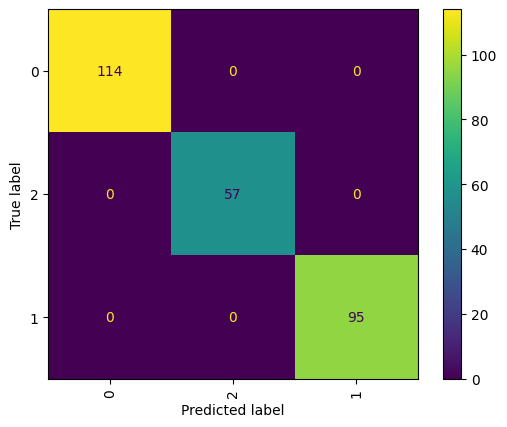

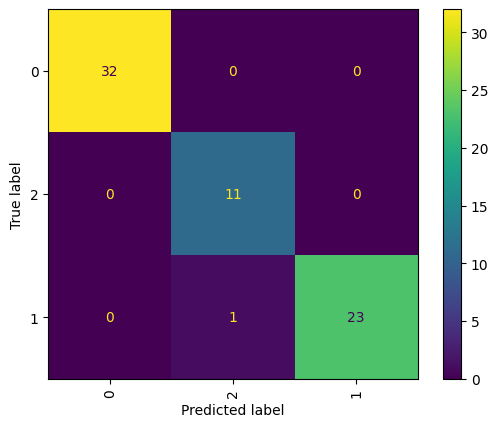

In [20]:
# Look at confusion matrices
display_confusion_matrix(train_scaled_df["label"], train_pred, display_labels=penguin_df["species"].unique().tolist())
display_confusion_matrix(test_scaled_df["label"], test_pred, display_labels=penguin_df["species"].unique().tolist())